In [19]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from statistics import mean
from sklearn import metrics

In [4]:
os.chdir('U:\\New')

In [135]:
dt=pd.read_excel('LUAD(2).xlsx',index_col=0)

In [136]:
dt.shape

(517, 14829)

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [18]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

regressor.fit(x_train, y_train)

#Predicting the Validation set results
y_predval = regressor.predict(x_val)

# KFOlD
estimator = regressor
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print(results.mean(), results.std())

-0.346132576088407 0.5361942633780311


In [20]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
16.65765060240964
mean squared error
539.7244235542169
root mean sqaured error
23.231969859532292


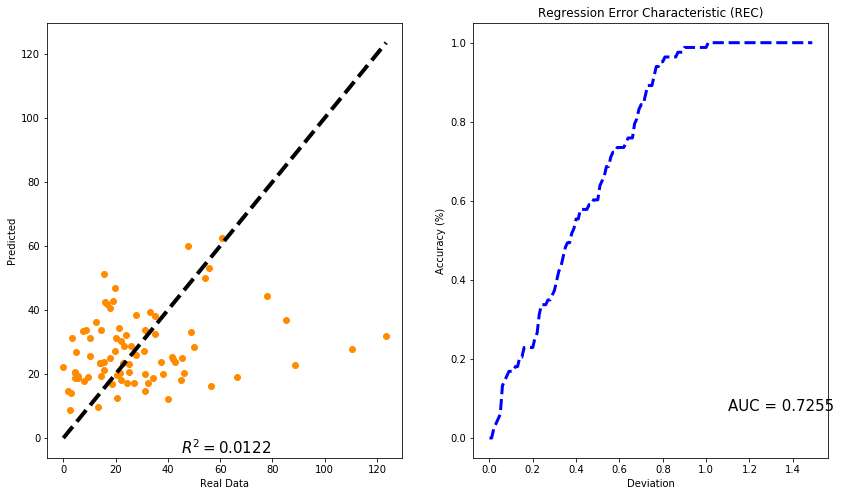

In [21]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [23]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

22.027509615384613
1387.5737628942309
37.250151179481556
Variance score: -0.02


In [133]:
type(y_train)

numpy.ndarray

In [139]:

# GRID SEARCH
param_grid = {    "n_estimators": [5, 10, 15],
                  "criterion":["mse"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [3, 4, 5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "bootstrap": ["True"],
                  "oob_score":["False"],
                  "n_jobs":[None],
                  "random_state":[None],
                  "verbose":[0, 1, 2, 3],
                  "warm_start": ["False"]}  
              
regressor = RandomForestRegressor()

grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=10)
grid_search = grid.fit(x_train, y_train)

print(grid_search.best_score_, grid_search.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [ ]:
                                        '''With standardization'''

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_val = sc_X.fit_transform(x_val)

sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))


In [34]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

regressor.fit(x_train, y_train)

#Predicting the Validation set results
y_predval = regressor.predict(x_val)

# KFOlD
estimator = regressor
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print(results.mean(), results.std())

-0.30128043710245833 0.4048339724704253


In [39]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
0.8949341368194543
mean squared error
1.323882156350336
root mean sqaured error
1.1506007806143432


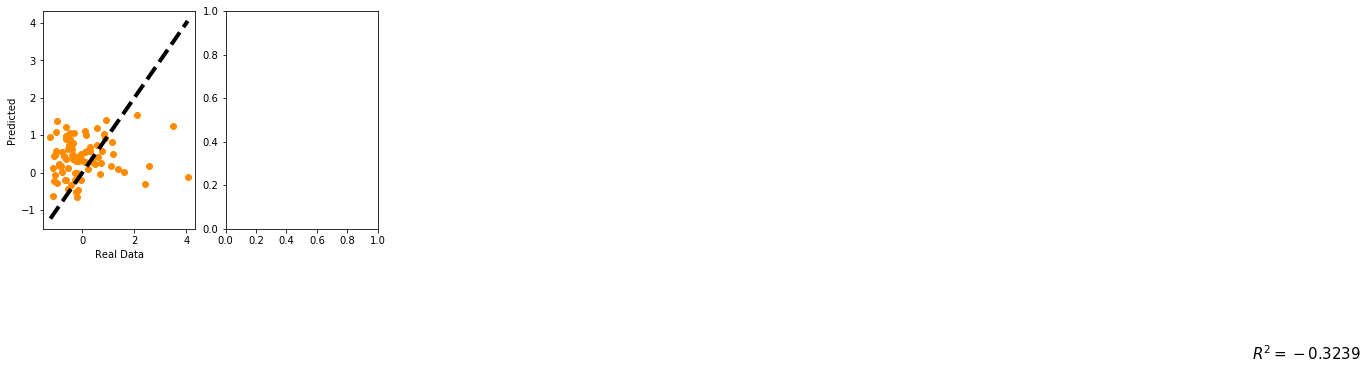

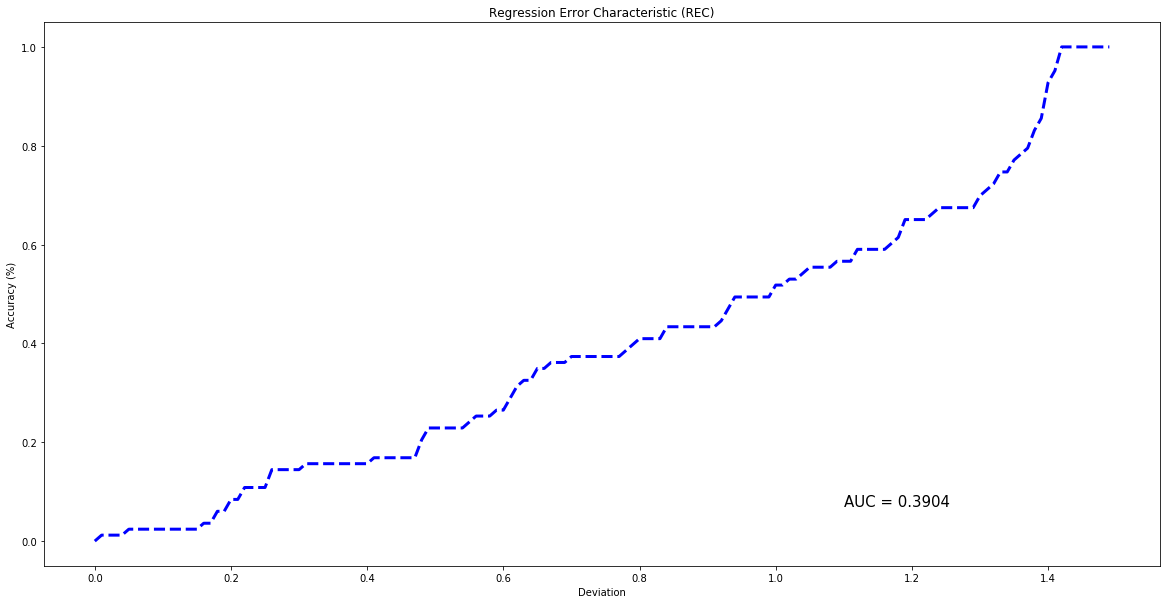

In [55]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting


plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)



plt.subplot(1, 2, 2)
plt.figure(figsize=(20 , 10))
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [56]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

0.6748796622701251
1.121094681410115
1.0588175864662028
Variance score: -0.12


In [ ]:
                                  '''Decisoin tree'''

In [ ]:
                               '''without standardization'''

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [71]:

# Fitting Simple Linear Regression to the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()


regressor.fit(x_train, y_train)



#Predicting the Validation set results
y_predval = regressor.predict(x_val)

# KFOlD
estimator = regressor
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[ -0.88807665  -0.82677172  -1.15893419  -1.57204702  -0.41507731
  -2.11097924  -0.63341134  -4.75815932  -0.56148732 -10.67046011]
-2.359540421896162 3.0241723077047737


In [72]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
20.371204819277107
mean squared error
843.3515313253013
root mean sqaured error
29.040515341937397


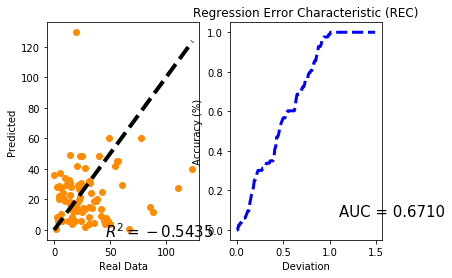

In [74]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
#plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
#plt.figure(figsize=(14 , 8))
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [75]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

26.43826923076923
1984.6178653846157
44.54905010642332
Variance score: -0.45


In [ ]:
                                  '''WITH STANDARDIZATION'''

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_val = sc_X.fit_transform(x_val)

sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))


In [61]:

# Fitting Simple Linear Regression to the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()


regressor.fit(x_train, y_train)



#Predicting the Validation set results
y_predval = regressor.predict(x_val)

# KFOlD
estimator = regressor
kfold = KFold(n_splits=10, random_state=0)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[-0.91409782 -1.65300388 -1.05316059 -1.69836302 -0.09780218 -4.22151801
 -0.86128183 -4.68184787 -1.00364482 -2.359616  ]
-1.8544336027281312 1.4226635940523982


In [62]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
0.8629081937778273
mean squared error
1.5386200438801128
root mean sqaured error
1.240411239823355


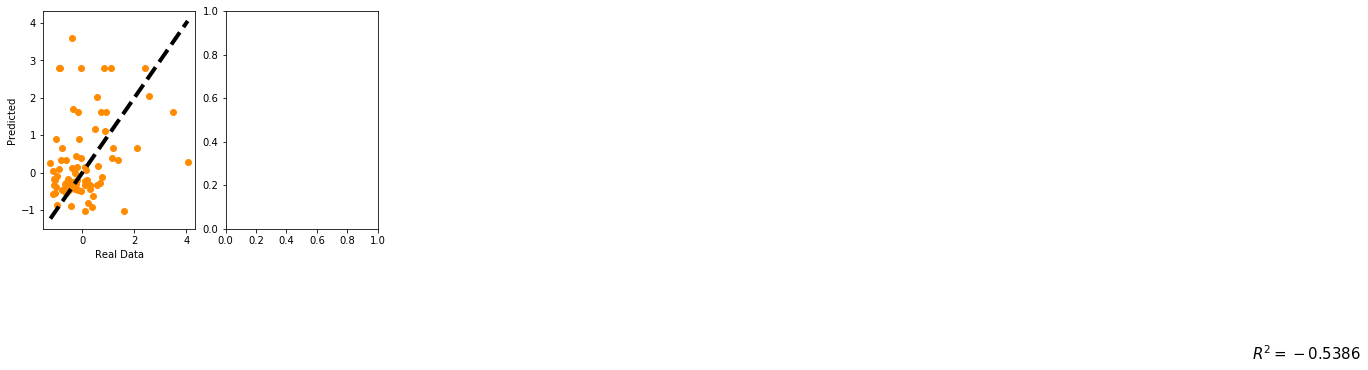

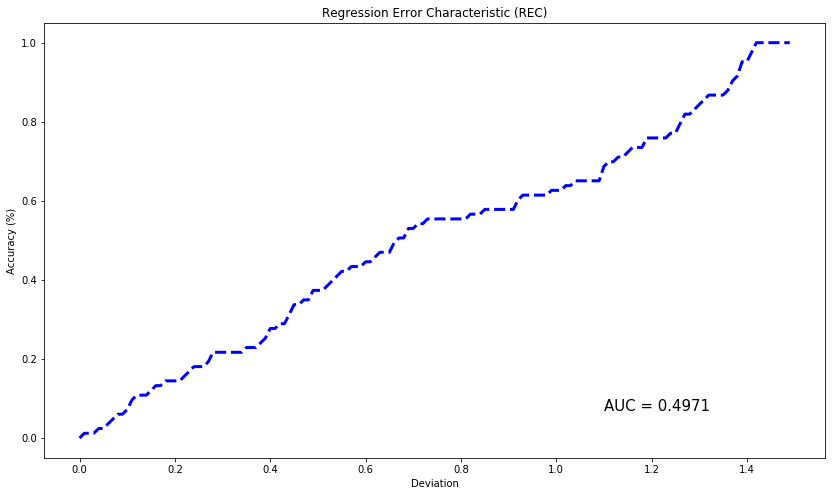

In [65]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
#plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.figure(figsize=(14 , 8))
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [66]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

0.7853287374577135
1.4992771605756334
1.2244497378723365
Variance score: -0.50


In [ ]:
                            '''ELASTIC NET REGRESSOR'''

In [ ]:
                           '''WITHOUT STANDARDIZATION'''

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [88]:
from sklearn.linear_model import ElasticNet
Ereg=ElasticNet(alpha=100)
Ereg.fit(x_train,y_train)
y_predval=Ereg.predict(x_val)
estimator=Ereg
kfold=KFold(n_splits=10,random_state=0)
results=cross_val_score(estimator,x_train,y_train,cv=kfold)
print(results.mean(),results.std())

-0.210074451638447 0.7242975228307424


In [89]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
18.121771294281114
mean squared error
663.0669127172797
root mean sqaured error
25.750085683688116


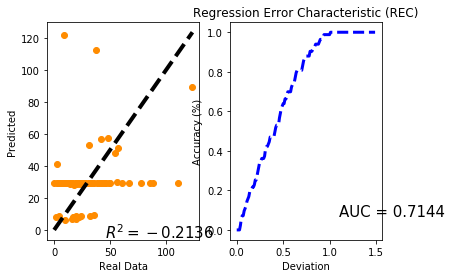

In [90]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
#plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
#plt.figure(figsize=(14 , 8))
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [91]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

26.704807692307693
2044.9388538461537
45.22100014203748
Variance score: -0.50


In [ ]:
                                 '''WITH STANDARDIZATION'''

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [115]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_val = sc_X.fit_transform(x_val)

sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))


In [122]:
from sklearn.linear_model import ElasticNet
Ereg=ElasticNet()
Ereg.fit(x_train,y_train)
y_predval=Ereg.predict(x_val)
estimator=Ereg
kfold=KFold(n_splits=10,random_state=0)
results=cross_val_score(estimator,x_train,y_train,cv=kfold)
print(results.mean(),results.std())

-0.04001549716681256 0.06933330023703141


In [117]:
print('mean absolute error:')
print(metrics.mean_absolute_error(y_val,y_predval))
print('mean squared error')
print(metrics.mean_squared_error(y_val,y_predval))
print('root mean sqaured error')
print(np.sqrt(metrics.mean_squared_error(y_val,y_predval)))

mean absolute error:
0.7306939992282167
mean squared error
0.9999999999999998
root mean sqaured error
0.9999999999999999


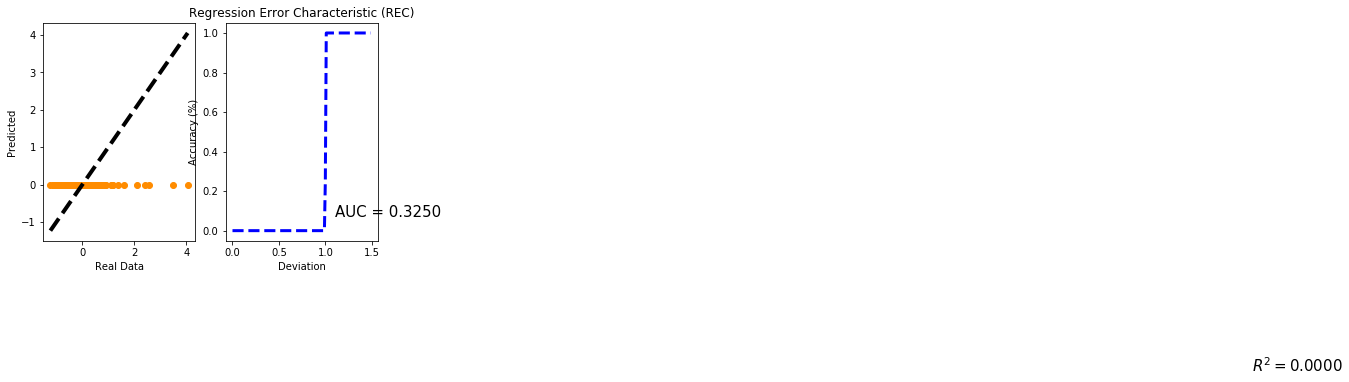

In [120]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
#plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
#plt.figure(figsize=(14 , 8))
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()


In [121]:

# Fitting Training Set
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % regressor.score(x_test, y_test))

0.8421356920381127
2.0187841493391825
1.420839241201897
Variance score: -1.02
